Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399 

In [1]:
# bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # dividir os dados em treino e teste
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## 1. Implemente diferentes funções em Python, usando o NumPy, para calcular:
a) Acurácia <br>
b) Precisão <br>
c) Recall <br>
d) F1-Measure <br>
e) MAE <br>
f) RMSE

### a) Acurácia

In [2]:
def acuracia(y_true, y_pred):
    return np.mean(y_true == y_pred)

### b) Precisão 

In [3]:
def precisao(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.array([(cm[i,i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) != 0 else 1) * np.sum(cm[i]) for i in range(len(cm))]))/np.sum(cm)
    #rec = np.array([cm[i,i] / np.sum(cm.T[:, i]) if np.sum(cm.T[:, i]) != 0 else 1 for i in range(len(cm))])
    #return np.sum(2 * prec * rec * np.sum(cm, axis=1) / (prec + rec)) / np.sum(cm)

### c) Recall

In [4]:
def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.array([(cm[i,i] / np.sum(cm[i, :]) if np.sum(cm[:, i]) != 0 else 1) * np.sum(cm[i]) for i in range(len(cm))]))/np.sum(cm)
    #return np.sum((np.diagonal(cm) / np.sum(cm, axis=1)) * np.sum(cm, axis=1))/np.sum(cm)
    #return np.sum([(cm[i, i] / np.sum(cm[i, :])) * np.sum(cm[i]) for i in range(len(cm))])/ np.sum(cm)

### d) F1-Measure

In [5]:
def f1_measure(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    prec = precisao(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2*((prec*rec)/(prec + rec))
    #return np.sum(2 * prec * rec * np.sum(cm, axis=1) / (prec + rec)) / np.sum(cm)

### e) MAE

In [6]:
def MAE(y_true, y_pred):
    return np.mean([abs(i[0] - i[1]) for i in zip(y_true, y_pred)])

### f) RMSE

In [7]:
def RMSE(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())

### 2. Calcule Acurácia, Precisão, Recall e F1-Measure para sua solução da questão 2 da Lista 04. Caso não tenha feito a questão 2 da Lista 04 terá que fazê-la agora.

In [8]:
# leitura dos dados
df_wine = pd.read_csv('../Lista-04/winequality-white.csv', sep=';')

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# separando os valores das features e a label

X = df_wine.iloc[:, :11]
y = df_wine.iloc[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 2.1 Crie diferentes modelos de classificação de vinho usando o kNN com diferentes valores de k.

Modelos de classificação com **k** variando de 1 a 7

In [11]:
medidas = {'Acuracia' : [], 'Precisao' : [], 'Recall' : [], 'f1_measure' : []}
for k in range(1, 8):
    # instanciando o classificador
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # treinando
    knn.fit(X_train, y_train)
    
    # predizendo os valores
    pred = knn.predict(X_test)
    
    # calculando as métricas
    medidas['Acuracia'].append(acuracia(y_test, pred))
    medidas['Precisao'].append(precisao(y_test, pred))
    medidas['Recall'].append(recall(y_test, pred))
    medidas['f1_measure'].append(f1_measure(y_test, pred))

In [12]:
medidas

{'Acuracia': [0.5544217687074829,
  0.47891156462585033,
  0.45918367346938777,
  0.47210884353741495,
  0.46462585034013604,
  0.4605442176870748,
  0.45714285714285713],
 'Precisao': [0.551372409099045,
  0.5046199790544434,
  0.46118725794206755,
  0.46617054385470924,
  0.4561252257973757,
  0.45855582668726175,
  0.44993937141859364],
 'Recall': [0.5544217687074829,
  0.47959183673469385,
  0.4598639455782313,
  0.47687074829931975,
  0.46938775510204084,
  0.46530612244897956,
  0.46190476190476193],
 'f1_measure': [0.552892884416476,
  0.49178767969514625,
  0.4605246511313431,
  0.4714599412191737,
  0.46266146494105137,
  0.46190631369053325,
  0.4558435606077074]}

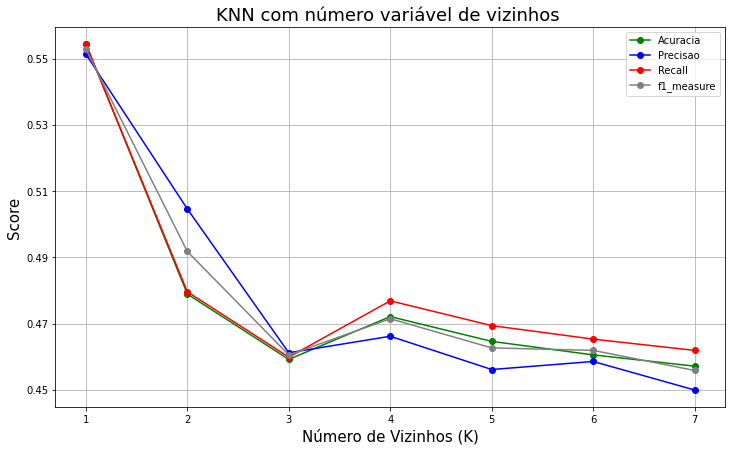

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 8), medidas['Acuracia'], color='green', marker='o')
plt.plot(range(1, 8), medidas['Precisao'], color='blue', marker='o')
plt.plot(range(1, 8), medidas['Recall'], color='red', marker='o')
plt.plot(range(1, 8), medidas['f1_measure'], color='gray', marker='o')
plt.grid()
plt.legend({'Acuracia' : 'Green', 'Precisao' : 'blue', 'Recall' : 'red', 'f1_measure' : 'gray'})


plt.title('KNN com número variável de vizinhos ', fontsize=18)
plt.xlabel('Número de Vizinhos (K)', fontsize=15)
plt.yticks(np.arange(0.45, 0.56, 0.02))
plt.ylabel('Score', fontsize=15);

### 3. Calcule MAE e RMSE para sua solução da questão 3.3 da Lista 05. Caso não tenha feito a questão 3.3 da Lista 05 terá que fazê-la agora.

###  Use o modelo de regressão sobre X_test para calcular os valores preditos dos rótulos (y_pred).

In [14]:
# instanciando o  modelo
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# treinando
knn_regressor.fit(X_train, y_train)

# prevendo
y_pred = knn_regressor.predict(X_test)

#### MAE

In [15]:
MAE(y_test, y_pred)

0.6337414965986394

#### RMSE

In [16]:
RMSE(y_test, y_pred)

0.8166298756116469